In [17]:
"""
This is a preliminary version of the last mile delivery use case
"""
import os
os.chdir(r"C:\workspace3\bluesky-USEPE-github")
import configparser
import pickle
import osmnx as ox

from nommon.city_model.city_graph import cityGraph
from nommon.city_model.corridors_implementation import corridorLoad
from nommon.city_model.dynamic_segments import dynamicSegments
from nommon.city_model.multi_di_graph_3D import MultiDiGrpah3D
from nommon.city_model.utils import read_my_graphml, layersDict
from nommon.city_model.path_planning import trajectoryCalculation, printRoute
from nommon.city_model.scenario_definition import createFlightPlan
from nommon.city_model.strategic_deconfliction import deconflcitedScenario, initialPopulation

In [2]:
    # -------------- 1. CONFIGURATION FILE -----------------
    """
    This section reads the configuration file.
    Change the config_path to read the desired file
    """
    # CONFIG
    config_path = r"C:\workspace3\bluesky-USEPE-github\nommon\use_case\settings_last_mile_delivery_test.cfg"
    config = configparser.ConfigParser()
    config.read( config_path )


['C:\\workspace3\\bluesky-USEPE-github\\nommon\\use_case\\settings_last_mile_delivery_test.cfg']

Obtaining the graph from OSM...


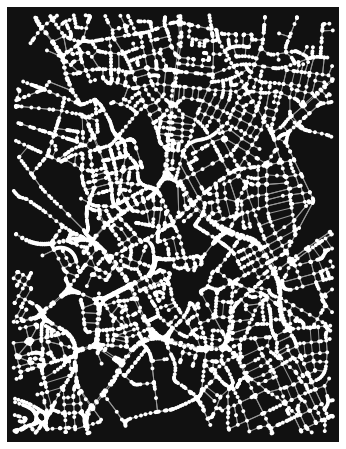

Reading the building data...
Calculating centroids...
Assigning altitude to sectors...
Creating diagonal edges...


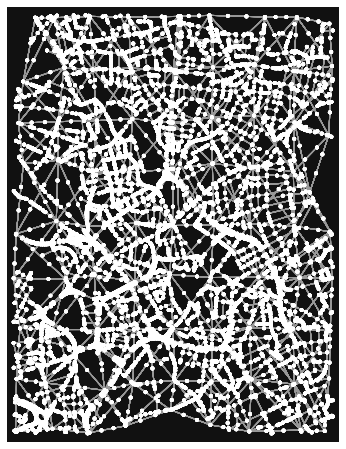

Saving the graph...


In [3]:
    # -------------- 2. CITY GRAPH -------------------------
    """
    This section creates a city graph or loads the graph defined with the city section of the
    configuration file.
    """
    # City
    if config['City'].getboolean( 'import' ):
        filepath = config['City']['imported_graph_path']
        G = read_my_graphml( filepath )
        G = MultiDiGrpah3D( G )
        # fig, ax = ox.plot_graph( G )
    else:
        G = cityGraph( config )


In [4]:
    # -------------- 3. SEGMENTS ----------------------------
    """
    This section creates a airspace segmentation or loads the segmentation defined with the segment
    section of the configuration file.
    Comment it to neglect the segmentation
    """
    os.chdir(r"C:\workspace3\bluesky-USEPE-github\nommon\use_case")
    if config['Segments'].getboolean( 'import' ):
        path = config['Segments']['path']
        with open( path, 'rb' ) as f:
            segments = pickle.load( f )
    else:
        segments = None

    # G, segments = dynamicSegments( G, config, segments, deleted_segments=None )

In [5]:
    # -------------- 4. CORRIDORS ---------------------------
    """
    This section loads the corridors defined with the corridor section of the configuration file
    Comment it to neglect the creation of corridors
    """
    G, segments = corridorLoad( G, segments, config )
    # G, segments = dynamicSegments( G, config, segments, deleted_segments=None )


Active corridors ['1', '2', '3', '4']


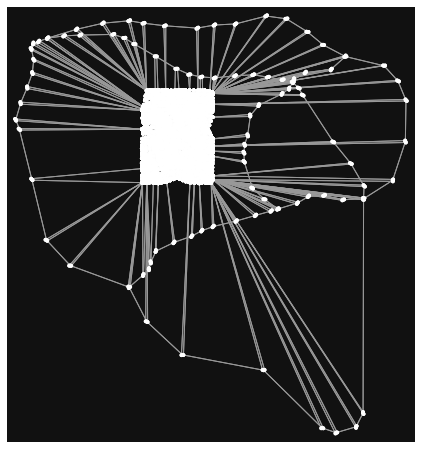

In [6]:
fig, ax = ox.plot_graph( G )

In [7]:
    # ---------------- 5. Segment update --------------------
    """
    Once we have loaded the segments and we created the corridors, we update the graph based on the parameters of the segments
    """
    G, segments = dynamicSegments( G, config, segments, deleted_segments=None )

Updating segments...
Assigning segments...
Updating segment velocity...
Updating travel times...
Dynamic segments completed


Calculating the route...
The travel time of the route is 540.5363


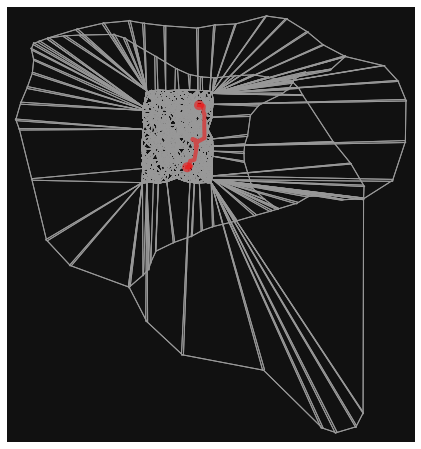

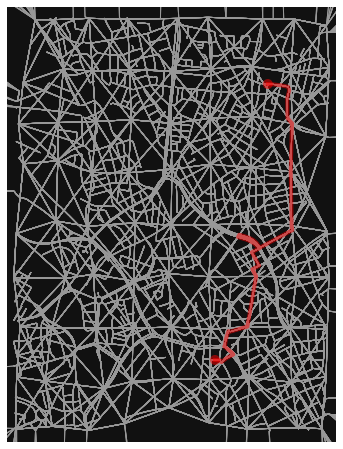

In [8]:
    # -------------- 6. PATH PLANNING -----------------------
    """
    This section computes an optimal trajectory from origin to destination. The trajectory is
    optimal according to travel time.
    Comment it to no calculate an optimal trajectory
    Introduce origin and destination points inside the graph
    """
    orig = [9.75, 52.394 ]  # origin point
    dest = [9.742, 52.367]  # destination point
    travel_time, route = trajectoryCalculation( G, orig, dest )
    print( 'The travel time of the route is {0}'.format( travel_time ) )
    # print( 'The route is {0}'.format( route ) )
    fig, ax = ox.plot_graph_route( G, route, node_size=0 )
    ax.set_xlim(9.709,9.761)
    ax.set_ylim(52.359,52.401)
    fig

In [9]:
print(route)

['D51635598', 'D8770920460', 'D375575472', 'D8770920464', 'D50920614', 'D6544725179', 'D51635652', 'D51635656', 'D51635593', 'D2937846190', 'D393954228', 'D282332777', 'D2667203194', 'D29595340', 'D8930945247', 'D1478105105_D8930945247_2', 'D1478105105_D8930945247_1', 'D1478105105', 'D5927529847_D1478105105_2', 'D5927529847_D1478105105_1', 'D5927529847', 'D33225316', 'D1791491547', 'D33225318', 'D2282156334', 'D8562672774', 'D206392312', 'D206392313', 'D8236609532', 'D8236609529', 'D275688180', 'D206392315', 'D29791539', 'D1478105040', 'D29727327', 'D316281985', 'D348327408', 'D29727326', 'D29791545', 'D29727325', 'D29727324', 'D2827114239', 'D1725237862', 'D8084008636', 'D29727599', 'D348406506', 'D60656022', 'D206392318', 'D2826793866', 'D29791540', 'D29727601', 'D271917442', 'D1834760973', 'D9024944394', 'D271917441', 'D60655246', 'D38983718', 'D60655247', 'D316277033', 'D735830564_D316277033_2', 'D735830564_D316277033_1', 'D735830564', 'D77669069', 'D735830487', 'D735830563', 'D298

In [10]:
for node in route:
    print([node, G.nodes[node]['y'], G.nodes[node]['x'], G.nodes[node]['segment']])

['D51635598', 52.3935527, 9.7501989, '220']
['D8770920460', 52.3935257, 9.7509047, '220']
['D375575472', 52.3935252, 9.7509177, '220']
['D8770920464', 52.3934785, 9.7515984, '220']
['D50920614', 52.3934337, 9.7522505, '221']
['D6544725179', 52.393427, 9.7523015, '221']
['D51635652', 52.3932826, 9.7533995, '231']
['D51635656', 52.3929497, 9.7535786, '65']
['D51635593', 52.3921912, 9.7532718, '231']
['D2937846190', 52.3921437, 9.7532723, '231']
['D393954228', 52.3907961, 9.7532908, '231']
['D282332777', 52.3905843, 9.7533075, '231']
['D2667203194', 52.3905218, 9.7533082, '231']
['D29595340', 52.3902534, 9.7533114, '231']
['D8930945247', 52.3897482, 9.7540165, '65']
['D1478105105_D8930945247_2', 52.38819086666667, 9.753951166666667, '65']
['D1478105105_D8930945247_1', 52.38663353333333, 9.753885833333333, '65']
['D1478105105', 52.3850762, 9.7538205, '65']
['D5927529847_D1478105105_2', 52.38333553333333, 9.753869466666666, '65']
['D5927529847_D1478105105_1', 52.38159486666667, 9.7539184333

Calculating the route...
The travel time of the route is 562.0608


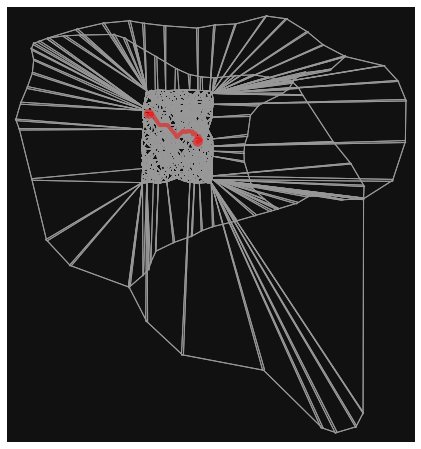

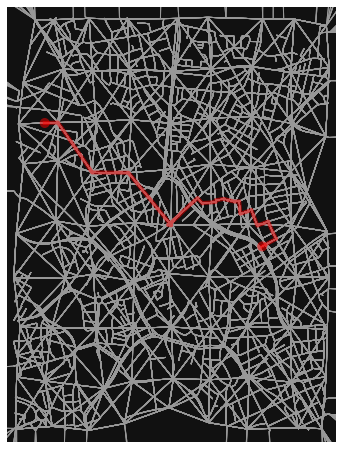

In [11]:
    # -------------- 6. PATH PLANNING -----------------------
    """
    This section computes an optimal trajectory from origin to destination. The trajectory is
    optimal according to travel time.
    Comment it to no calculate an optimal trajectory
    Introduce origin and destination points inside the graph
    """
    A = [9.715, 52.39 ]  # origin point
    B = [9.7493106, 52.377872]  # destination point
    travel_time, route = trajectoryCalculation( G, A, B )
    print( 'The travel time of the route is {0}'.format( travel_time ) )
    # print( 'The route is {0}'.format( route ) )
    fig, ax = ox.plot_graph_route( G, route, node_size=0 )
    ax.set_xlim(9.709,9.761)
    ax.set_ylim(52.359,52.401)
    fig
    # ['D8236609529', 52.377872, 9.7493106, '410']

In [12]:
print(route)

['I295929887_I1597036799_2', 'I1597036799', 'I1399688238_I1597036799_2', 'I1399688238_I1597036799_1', 'I1399688238', 'I1399688238_I1516337144_1', 'I1399688238_I1516337144_2', 'I1516337144', 'I272429912_I1516337144_2', 'I272429912_I1516337144_1', 'I272429912', 'I2413172098', 'I6957354839', 'I1776299345', 'I26235017', 'I664753727', 'I301997146', 'I26234898', 'I1830193609', 'I26234897', 'I301997144', 'I4335159185', 'I6245331330', 'I5033896926', 'I1847447084', 'I9020032372', 'I26235427', 'I25811244', 'I306566105', 'I6647269493', 'I25811251', 'I1465124565', 'I1847447116', 'I25813189', 'I3547434128', 'I25813237', 'I25813233', 'I25813241', 'I25813223', 'I25795494', 'I25795959', 'I25791104', 'I25797832', 'I60655219', 'I248454680', 'I3928924723', 'I29860237', 'I201493258', 'I25802098', 'I7905368310', 'I348327380', 'I206392298', 'H206392298', 'G206392298', 'G50140646', 'G8858848264', 'G206392307', 'G206392312', 'G206392313', 'G8236609532', 'G8236609529']


In [14]:
# -------------- 7. Scenario definition -----------------------
"""
This section computes scenarios to be used in BlueSky.
We generate the flight plan of one drone. A scenario file is generated, which can be loaded by
BlueSky. The "createFlightPlan" function transforms the optimal path (list of waypoints) to
BlueSky commands
"""
ac = 'U001'
departure_time = '00:00:00.00'
scenario_path = r'.\scenario\U001.scn'
scenario_file = open( scenario_path, 'w' )
layers_dict = layersDict( config )
createFlightPlan( route, ac, departure_time, G, layers_dict, scenario_file )
scenario_file.close()


Creating flight plan of U001...


Calculating the route...
The travel time of the route is 540.5363


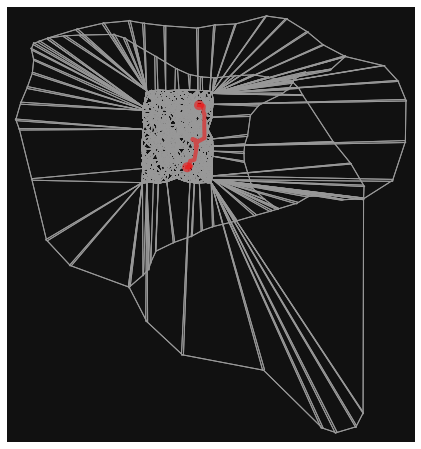

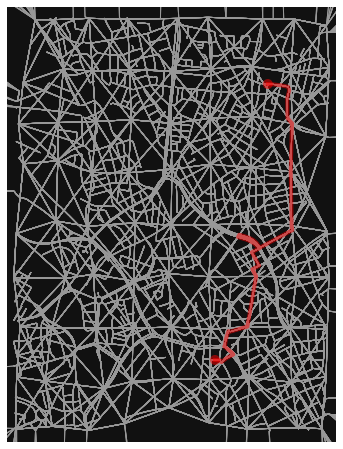

In [18]:
    # -------------- 6. PATH PLANNING -----------------------
    """
    This section computes an optimal trajectory from origin to destination. The trajectory is
    optimal according to travel time.
    Comment it to no calculate an optimal trajectory
    Introduce origin and destination points inside the graph
    """
    C = [9.75, 52.394 ]  # origin point
    B = [9.7493106, 52.377872]  # destination point
    D = [9.742, 52.367]
    travel_time, route = trajectoryCalculation( G, C, D )
    print( 'The travel time of the route is {0}'.format( travel_time ) )
    # print( 'The route is {0}'.format( route ) )
    fig, ax = ox.plot_graph_route( G, route, node_size=0 )
    ax.set_xlim(9.709,9.761)
    ax.set_ylim(52.359,52.401)
    fig

In [28]:
# -------------- 8. Strategic deconfliction -----------------------
"""
This section computes an strategic deconflicted trajectory from origin to destination. An
empty initial population is generated.
"""
initial_time = 0  # seconds
final_time = 1800  # seconds
users = initialPopulation( segments, initial_time, final_time )
segments['410']['capacity'] = 1

In [ ]:
orig = C  # origin point
dest = D  # destination point
ac = 'U002'
departure_time = 308  # seconds
scenario_path =  r'.\scenario\U001.scn'
scenario_file = open( scenario_path, 'w' )
users = deconflcitedScenario( orig, dest, ac, departure_time, G, users, initial_time,
                              final_time, segments, layers_dict, scenario_file, config )
scenario_file.close()

In [19]:
562 -254

308

In [ ]:
a = ()

In [ ]:
b = a + (4,)
b

In [ ]:
segments['65']

In [ ]:
G.edges['I1569756536','COR_r_1_3_in_1',0]

In [ ]:
G.nodes['I1569756536']

In [ ]:
G.nodes['COR_r_1_3_in_1']

In [ ]:
x.distance.great_circle_vec( node_lat, node_lon,                       self.nodes[elem]['y'],
                                                                            self.nodes[elem]['x'] )

In [ ]:
G.edges['COR_r_1_3_in_1','COR_r_1_3_in_2',0]

In [ ]:
list(G.neighbors('COR_r_1_3_in_2'))

In [ ]:
G.edges['COR_r_1_3_in_2','COR_r_1_3',0]

In [ ]:
G.nodes['COR_r_1_3']

In [ ]:
50/(100*1000/3600)

In [ ]:
G.nodes['COR_r_1_3_in_1']

In [ ]:
G.nodes['COR_r_1_3_in_2']

In [ ]:
G.nodes['I1569756536']

In [ ]:
segments['241']

In [26]:
G.nodes['G8236609529']

{'y': 52.377872, 'x': 9.7493106, 'z': 175, 'segment': '410'}

{'lon_min': 9.748982790717518,
 'lon_max': 9.75028911829502,
 'lat_min': 52.36999754481622,
 'lat_max': 52.38811151508004,
 'z_min': 0,
 'z_max': 500,
 'speed': 5.0,
 'capacity': 5,
 'new': False,
 'updated': False,
 'class': 'white'}